In [4]:
import numpy as np
import pandas as pd
from scipy import ndimage

import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
import matplotlib.pyplot as plt

Working with 8856 images
Image examples: 
2020-10-25_1900_0.png


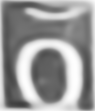

2020-10-25_1900_1.png


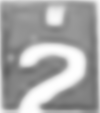

In [12]:
folder = "digits_image"
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

In [13]:
df = pd.read_csv('labels.csv', index_col='filename')  

train_files = []
test_files = []
train_labels = []
test_labels = []

In [14]:
i = 0
for _file in onlyfiles:
    i += 1
    try:
        k = df.loc[_file]['label']
        if (i%1000)==0: print(i, _file, k)
        if (i%7) == 0:
            test_files.append(_file)
            test_labels.append(int(k))
        else:
            train_files.append(_file)
            train_labels.append(int(k))
    except KeyError:
        #print(i, 'KeyError', _file, )
        continue
    
print("Files in train_files: %d" % len(train_files))

Files in train_files: 5267


In [15]:
len(test_labels)

874

In [16]:
# Original Dimensions
image_width = 28
image_height = 28

trainset = np.ndarray(shape=(len(train_files), image_height, image_width), dtype=np.float32)

i = 0
for _file in train_files:
    img = Image.open(folder + "/" + _file)  # this is a PIL image
    img = img.resize((image_width, image_height))
    x = np.array(img)
    trainset[i] = x
    if i % 1000 == 0:
        print("%d images to array" % i)
    i += 1
print("%d images to array!"%i)

testset = np.ndarray(shape=(len(test_files), image_height, image_width), dtype=np.float32)

i = 0
for _file in test_files:
    img = Image.open(folder + "/" + _file)  # this is a PIL image
    img = img.resize((image_width, image_height))
    x = np.array(img)
    testset[i] = x
    if i % 1000 == 0:
        print("%d images to array" % i)
    i += 1
print("%d images to array!"%i)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

0 images to array
1000 images to array
2000 images to array
3000 images to array
4000 images to array
5000 images to array
5267 images to array!
0 images to array
874 images to array!


In [17]:
np.savez_compressed('numbers', trainset=trainset, train_labels=train_labels, testset=testset, test_labels=test_labels)